In [39]:
!pip install tensorflow==2.12.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
# import tensorflow_datasets as tfds
# import matplotlib.pyplot as plt
# dataset = tfds.load('mnist', download=True, as_supervised=True, split = 'train').batch(10)
# image, label = next(iter(dataset))
# fig, axes = plt.subplots(2,5,figsize=(15,6))
# for idx, axe in enumerate(axes.flatten()):
#     axe.axis('off')
#     axe.set_title(f'label : {label[idx]}')
#     axe.imshow(image[idx][...,0])
# plt.show()

# 数据准备

In [41]:
import os
import urllib.request
import gzip
import numpy as np

# 定义保存MNIST数据集的目录
data_dir = "MNIST_data/"

# 创建目录（如果不存在）
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# 定义数据集的下载地址
base_url = "http://yann.lecun.com/exdb/mnist/"
file_names = ['train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz',
              't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']

# 下载数据集文件并保存到指定目录
for file_name in file_names:
    url = base_url + file_name
    file_path = os.path.join(data_dir, file_name)
    urllib.request.urlretrieve(url, file_path)

# 解压缩并加载训练数据集
with gzip.open(os.path.join(data_dir, 'train-images-idx3-ubyte.gz'), 'rb') as f:
    train_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 784)
with gzip.open(os.path.join(data_dir, 'train-labels-idx1-ubyte.gz'), 'rb') as f:
    train_labels = np.frombuffer(f.read(), np.uint8, offset=8)

# 解压缩并加载测试数据集
with gzip.open(os.path.join(data_dir, 't10k-images-idx3-ubyte.gz'), 'rb') as f:
    test_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 784)
with gzip.open(os.path.join(data_dir, 't10k-labels-idx1-ubyte.gz'), 'rb') as f:
    test_labels = np.frombuffer(f.read(), np.uint8, offset=8)

# 将标签转换为one-hot编码
train_labels = np.eye(10)[train_labels]
test_labels = np.eye(10)[test_labels]

# 打印数据集大小
print('Train:', train_images.shape[0])
print('Test:', test_images.shape[0])

# 将数据集存储在mnist字典中
mnist = {
    'train_images': train_images,
    'train_labels': train_labels,
    'test_images': test_images,
    'test_labels': test_labels
}
print(mnist)

Train: 60000
Test: 10000
{'train_images': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'train_labels': array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]]), 'test_images': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'test_labels': array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0

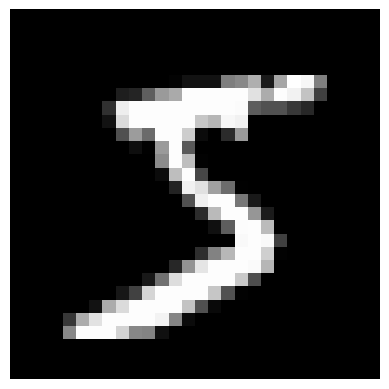

In [42]:
import matplotlib.pyplot as plt

# 提取第一张训练图像
first_train_image = mnist['train_images'][0]

# 将一维图像数据重新调整为二维
reshaped_image = first_train_image.reshape((28, 28))

# 显示图像
plt.imshow(reshaped_image, cmap='gray')
plt.axis('off')
plt.show()

# 建立共享函数

In [43]:
def weight(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1),
                       name ='W')

In [44]:
def bias(shape):
    return tf.Variable(tf.constant(0.1, shape=shape)
                       , name = 'b')

In [45]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], 
                        padding='SAME')

In [46]:
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], 
                          strides=[1,2,2,1], 
                          padding='SAME')

# 输入层 Input Layer

In [47]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# 输入层 Input Layer
with tf.name_scope('Input_Layer'):
    x = tf.placeholder(shape=[None, 784], dtype=tf.float32, name="x")
    x_image = tf.reshape(x, [-1, 28, 28, 1])


# Convolutional Layer 1

In [48]:
with tf.name_scope('C1_Conv'):
    W1 = weight([5,5,1,16])
    b1 = bias([16])
    Conv1=conv2d(x_image, W1)+ b1
    C1_Conv = tf.nn.relu(Conv1 )

In [49]:
with tf.name_scope('C1_Pool'):
    C1_Pool = max_pool_2x2(C1_Conv)

# Convolutional Layer 2

In [50]:
with tf.name_scope('C2_Conv'):
    W2 = weight([5,5,16,36])
    b2 = bias([36])
    Conv2=conv2d(C1_Pool, W2)+ b2
    C2_Conv = tf.nn.relu(Conv2)

In [51]:
with tf.name_scope('C2_Pool'):
    C2_Pool = max_pool_2x2(C2_Conv) 

# Fully Connected Layer

In [52]:
with tf.name_scope('D_Flat'):
    D_Flat = tf.reshape(C2_Pool, [-1, 1764])

In [53]:
with tf.name_scope('D_Hidden_Layer'):
    W3= weight([1764, 128])
    b3= bias([128])
    D_Hidden = tf.nn.relu(
                  tf.matmul(D_Flat, W3)+b3)
    D_Hidden_Dropout= tf.nn.dropout(D_Hidden, 
                                keep_prob=0.8)

# 输出层Output

In [54]:
with tf.name_scope('Output_Layer'):
    W4 = weight([128,10])
    b4 = bias([10])
    y_predict= tf.nn.softmax(
                 tf.matmul(D_Hidden_Dropout,
                           W4)+b4)

# 设置训练模型最优化步驟

In [55]:
with tf.name_scope("optimizer"):
    
    y_label = tf.placeholder("float", shape=[None, 10], 
                              name="y_label")
    
    loss_function = tf.reduce_mean(
                      tf.nn.softmax_cross_entropy_with_logits
                         (logits=y_predict , 
                          labels=y_label))
    
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001) \
                    .minimize(loss_function)

# 设置評估模型

In [56]:
with tf.name_scope("evaluate_model"):
    correct_prediction = tf.equal(tf.argmax(y_predict, 1),
                                  tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 训练模型

In [57]:
trainEpochs = 10
batchSize = 100
totalBatchs = int(mnist['train_images'].shape[0] / batchSize)
# totalBatchs = int(mnist.train.num_examples/batchSize)
epoch_list=[];accuracy_list=[];loss_list=[];
from time import time
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [58]:
def get_next_batch(images, labels, batch_size):
    indices = np.random.choice(len(images), size=batch_size, replace=False)
    batch_x = images[indices]
    batch_y = labels[indices]
    return batch_x, batch_y

In [59]:
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = get_next_batch(mnist['train_images'], mnist['train_labels'], batchSize)
        sess.run(optimizer, feed_dict={x: batch_x, y_label: batch_y})

    loss, acc = sess.run([loss_function, accuracy], feed_dict={x: mnist['test_images'], y_label: mnist['test_labels']})

    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)

    print("Train Epoch:", '%02d' % (epoch + 1), "Loss=", "{:.9f}".format(loss), "Accuracy=", acc)

duration = time() - startTime
print("Train Finished takes:", duration)

Train Epoch: 01 Loss= 2.004478455 Accuracy= 0.4563
Train Epoch: 02 Loss= 1.934356213 Accuracy= 0.5267
Train Epoch: 03 Loss= 1.910748005 Accuracy= 0.5501
Train Epoch: 04 Loss= 1.821872473 Accuracy= 0.6389
Train Epoch: 05 Loss= 1.737104654 Accuracy= 0.7236
Train Epoch: 06 Loss= 1.720928073 Accuracy= 0.7401
Train Epoch: 07 Loss= 1.708252192 Accuracy= 0.7527
Train Epoch: 08 Loss= 1.706400752 Accuracy= 0.7541
Train Epoch: 09 Loss= 1.702478170 Accuracy= 0.7584
Train Epoch: 10 Loss= 1.639487147 Accuracy= 0.8212
Train Finished takes: 839.0277185440063


In [60]:
# for epoch in range(trainEpochs):
#     for i in range(totalBatchs):
#         batch_x, batch_y = mnist.train.next_batch(batchSize)
#         sess.run(optimizer,feed_dict={x: batch_x, y_label: batch_y})
#     loss,acc = sess.run([loss_function,accuracy], feed_dict={x: mnist.validation.images, y_label: mnist.validation.labels})

#     epoch_list.append(epoch)
#     loss_list.append(loss);accuracy_list.append(acc)    
    
    
# duration =time()-startTime
# print("Train Finished takes:",duration)

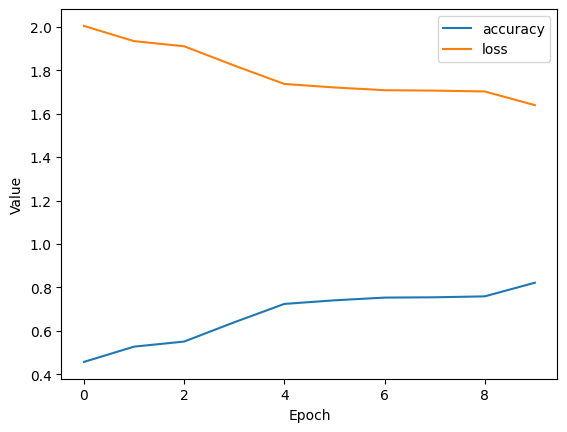

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(epoch_list, accuracy_list, label="accuracy")
plt.plot(epoch_list, loss_list, label="loss")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.show()

# 评估模型的准确率

In [62]:
num_test_images = len(mnist['test_images'])
print("Number of test images:", num_test_images)

Number of test images: 10000


In [63]:
print("Accuracy:", sess.run(accuracy, feed_dict={x: mnist['test_images'], y_label: mnist['test_labels']}))

Accuracy: 0.8264


In [64]:
print("Accuracy:", sess.run(accuracy, feed_dict={x: mnist['test_images'][:5000], y_label: mnist['test_labels'][:5000]}))

Accuracy: 0.8178


In [65]:
print("Accuracy:", sess.run(accuracy, feed_dict={x: mnist['test_images'][5000:], y_label: mnist['test_labels'][5000:]}))

Accuracy: 0.8306


# 预测概率

In [66]:
y_pred = sess.run(y_predict, feed_dict={x: mnist['test_images'][:5000]})

In [67]:
y_pred[:5]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 9.9999994e-01, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.9999994e-01, 0.0000000e+00, 1.4630538e-33, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

# 预测结果

In [68]:
prediction_result = sess.run(tf.argmax(y_pred, 1), feed_dict={x: mnist['test_images'], y_label: mnist['test_labels']})

In [69]:
prediction_result[:10]

array([7, 2, 1, 6, 4, 1, 4, 9, 5, 9])

In [70]:
def show_images_labels_predict(images, labels, prediction_result):
    fig = plt.gcf()
    fig.set_size_inches(8, 10)
    for i in range(0, 10):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(np.reshape(images[i], (28, 28)), cmap='binary')
        ax.set_title("label=" + str(np.argmax(labels[i])) +
                     ", predict=" + str(prediction_result[i]), fontsize=9)
    plt.show()

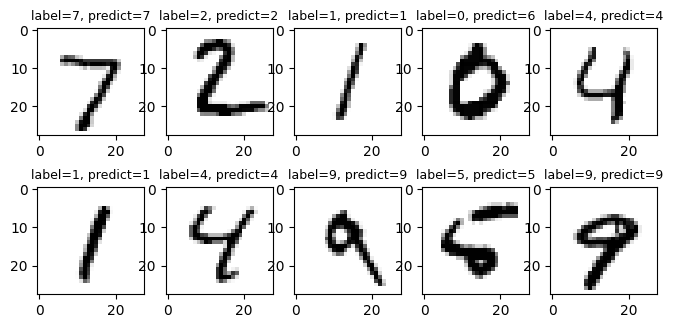

In [71]:
show_images_labels_predict(mnist['test_images'], mnist['test_labels'], prediction_result)

# 找出预测错误

In [72]:
for i in range(500):
    if prediction_result[i] != np.argmax(mnist['test_labels'][i]):
        print("i=" + str(i) +
              "   label=", np.argmax(mnist['test_labels'][i]),
              "predict=", prediction_result[i])

i=3   label= 0 predict= 6
i=10   label= 0 predict= 8
i=13   label= 0 predict= 8
i=22   label= 6 predict= 7
i=25   label= 0 predict= 6
i=28   label= 0 predict= 8
i=33   label= 4 predict= 6
i=55   label= 0 predict= 8
i=69   label= 0 predict= 5
i=71   label= 0 predict= 5
i=78   label= 9 predict= 8
i=80   label= 7 predict= 9
i=101   label= 0 predict= 8
i=111   label= 7 predict= 1
i=114   label= 7 predict= 2
i=121   label= 4 predict= 6
i=126   label= 0 predict= 6
i=136   label= 0 predict= 8
i=142   label= 3 predict= 2
i=148   label= 0 predict= 6
i=149   label= 2 predict= 9
i=157   label= 0 predict= 8
i=171   label= 7 predict= 9
i=175   label= 7 predict= 9
i=183   label= 0 predict= 6
i=188   label= 0 predict= 1
i=190   label= 1 predict= 4
i=192   label= 0 predict= 6
i=193   label= 9 predict= 3
i=194   label= 0 predict= 7
i=195   label= 3 predict= 7
i=215   label= 0 predict= 8
i=217   label= 6 predict= 5
i=220   label= 7 predict= 9
i=222   label= 2 predict= 8
i=233   label= 8 predict= 7
i=243

In [73]:
def show_images_labels_predict_error(images, labels, prediction_result):
    fig = plt.gcf()
    fig.set_size_inches(8, 10)
    i = 0
    j = 0
    while i < 10:
        if prediction_result[j] != np.argmax(labels[j]):
            ax = plt.subplot(5, 5, 1 + i)
            ax.imshow(np.reshape(images[j], (28, 28)), cmap='binary')
            ax.set_title("j=" + str(j) +
                         ", l=" + str(np.argmax(labels[j])) +
                         ", p=" + str(prediction_result[j]), fontsize=9)
            i = i + 1
        j = j + 1
    plt.show()

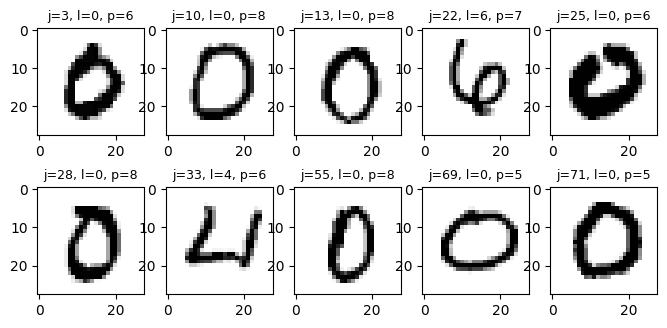

In [74]:
show_images_labels_predict_error(mnist['test_images'], mnist['test_labels'], prediction_result)

# 儲存模型

In [75]:
saver = tf.train.Saver()
save_path = saver.save(sess, "saveModel/CNN_model1")
print("Model saved in file: %s" % save_path)

Model saved in file: saveModel/CNN_model1


In [76]:
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('log/CNN', sess.graph)

# sess.close()